# Vecteurs aléatoires, notamment gaussiens

In [10]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=2,suppress=True)
import scipy.stats as stats
import pandas as pd

## Préliminaire: Décomposition en valeurs singulières (SVD)

### Cas général

C'est une factorisation en trois facteurs ayant des propriétés particulières (observez, déduisez). 

In [11]:
A=np.array([[1,2,3],[4,5,6]])
U,S,V = np.linalg.svd(A)

print("A\n",A)
print("U\n",U)
print("S\n",S)
print("V\n",V)

diag=np.zeros((2,3))
diag[0,0]=S[0]
diag[1,1]=S[1]

print("U@diag@V\n",U@diag@V)
print("U@U.T\n",U@U.T)
print("V@V.T\n",V@V.T)

A
 [[1 2 3]
 [4 5 6]]
U
 [[-0.39 -0.92]
 [-0.92  0.39]]
S
 [9.51 0.77]
V
 [[-0.43 -0.57 -0.7 ]
 [ 0.81  0.11 -0.58]
 [ 0.41 -0.82  0.41]]
U@diag@V
 [[1. 2. 3.]
 [4. 5. 6.]]
U@U.T
 [[1. 0.]
 [0. 1.]]
V@V.T
 [[ 1. -0.  0.]
 [-0.  1. -0.]
 [ 0. -0.  1.]]


### Interprétation géométrique:  

Considérons application linéaire $T : \mathbb R^n \to \mathbb R^m$, associée à la matrice $A$. On peut trouver une base orthonormale de $\mathbb R^n$ et une base orthonormale pour $\mathbb R^m$ telles que $T$ associe au i-ème vecteur de base de $\mathbb R^n$ un multiple positif du i-ème vecteur de base de $\mathbb R^n$, les vecteurs restants ayant pour image 0. Dans ces bases, l'application $T$ est donc représentée par une matrice diagonale dont les coefficients sont des réels positifs.


***Exo:*** Quel est le lien entre le texte précédent et la formule `U,S,V = np.linalg.svd(A)`. Indiquez précisément quelles sont les bases. Attention, il y a un piège. 


***A vous:*** 

* Ci-dessous, observez l'application $T : \mathbb R^2 \to \mathbb R^2, x \to ax$. 
* Commentez:  à quel moment fait-on une isométrie (laquelle?), une dilatation ?

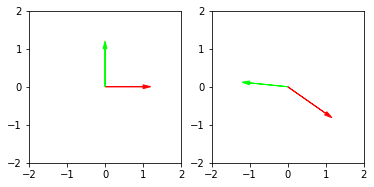

In [12]:
import matplotlib.patches as patches

def showBasis(vecs,lim=(-2,2),color0=(1,0,0),color1=(0,1,0)):
    
    vec0=vecs[:,0]
    vec1=vecs[:,1]

    
    plt.arrow(0,0,vec0[0],vec0[1], head_width=0.1, head_length=0.2,color=color0)
    plt.arrow(0,0,vec1[0],vec1[1], head_width=0.1, head_length=0.2,color=color1)
    
    # plus simplement, on peut faire
    # plt.plot([0,vec0[0]],[0,vec1[0]],color=[1,0,blue])
    
    plt.gca().set_aspect("equal")
    # attention avec plt.arrow il faut nécessaire préciser le domaine (sinon c'est moche)
    plt.xlim(lim[0],lim[1])
    plt.ylim(lim[0],lim[1])
    
"""matrice de l'application"""    
a=np.array([[1,-1],[-0.7,0.1]])
"""observons comment elle transforme la base canonique """
vecs=np.eye(2)
plt.subplot(1,2,1)
showBasis(vecs)
plt.subplot(1,2,2)
showBasis(a@vecs)

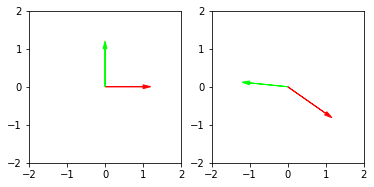

In [17]:
import matplotlib.patches as patches


def showBasis(ax,vecs,lim=(-2,2),color0=(1,0,0),color1=(0,1,0)):
    
    ax.set_aspect("equal")

    vec0=vecs[:,0]
    vec1=vecs[:,1]
    
    ax.arrow(0,0,vec0[0],vec0[1], head_width=0.1, head_length=0.2,color=color0)
    ax.arrow(0,0,vec1[0],vec1[1], head_width=0.1, head_length=0.2,color=color1)
    
    # plus simplement, on peut faire
    # ax.plot([0,vec0[0]],[0,vec1[0]],color=[1,0,blue])
    
    # attention avec plt.arrow il faut nécessaire préciser le domaine (sinon c'est moche)
    ax.set_xlim(lim[0],lim[1])
    ax.set_ylim(lim[0],lim[1])
    
"""matrice de l'application"""    
a=np.array([[1,-1],[-0.7,0.1]])
"""observons comment elle transforme la base canonique """
vecs=np.eye(2)

fig,ax=plt.subplots(1,2)

"""matrice de l'application"""    
a=np.array([[1,-1],[-0.7,0.1]])
"""observons comment elle transforme la base canonique """
vecs=np.eye(2)
showBasis(ax[0],vecs)
showBasis(ax[1],a@vecs)


a
 [[ 1.  -1. ]
 [-0.7  0.1]]
U
 [[-0.92  0.4 ]
 [ 0.4   0.92]]
S
 [1.53 0.39]
V
 [[-0.78  0.62]
 [-0.62 -0.78]]


TypeError: showBasis() missing 1 required positional argument: 'vecs'

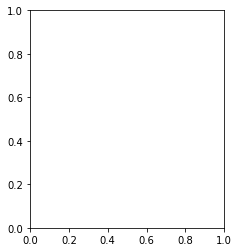

In [14]:
""" observons maintenant les transformations pas à pas """
U,S,V = np.linalg.svd(a)

print("a\n",a)
print("U\n",U)
print("S\n",S)
print("V\n",V)



plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
showBasis(vecs)
plt.subplot(1,4,2)
showBasis(np.eye(2),color0=(0,0,1),color1=(0,0,1))
showBasis(V@vecs)
plt.subplot(1,4,3)
showBasis(np.diag(S),color0=(0,0,1),color1=(0,0,1))
showBasis(np.diag(S)@V@vecs)
plt.subplot(1,4,4)
showBasis(U@np.diag(S)@V@vecs)

a
 [[ 1.  -1. ]
 [-0.7  0.1]]
U
 [[-0.92  0.4 ]
 [ 0.4   0.92]]
S
 [1.53 0.39]
V
 [[-0.78  0.62]
 [-0.62 -0.78]]


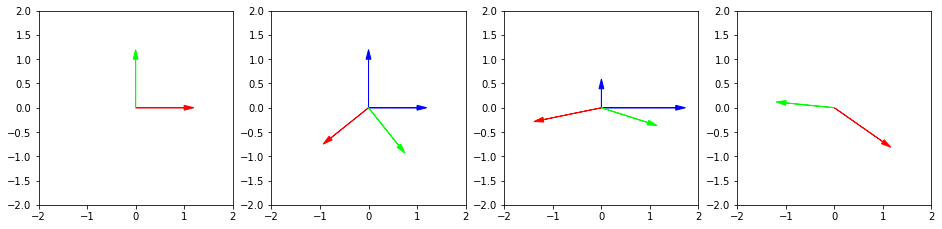

In [18]:
""" observons maintenant les transformations pas à pas """
U,S,V = np.linalg.svd(a)
print("a\n",a)
print("U\n",U)
print("S\n",S)
print("V\n",V)

fig,ax=plt.subplots(1,4)
fig.set_size_inches(16,4)
showBasis(ax[0],vecs)
showBasis(ax[1],np.eye(2),color0=(0,0,1),color1=(0,0,1))
showBasis(ax[1],V@vecs)
showBasis(ax[2],np.diag(S),color0=(0,0,1),color1=(0,0,1))
showBasis(ax[2],np.diag(S)@V@vecs)
showBasis(ax[3],U@np.diag(S)@V@vecs)

### Cas symétrique défini positif

***A vous:*** Quel est le lien entre la diagonalisation et la svd dans ce cas?

In [30]:
""" prenons une matrice symétrique, diagonalisons là"""
B=np.array([[2,-1],[-1,2]])

val_pr,vec_pr=np.linalg.eig(B)
print("val_pr:\n",val_pr)
print("vec_pr:\n",vec_pr)

val_pr:
 [3. 1.]
vec_pr:
 [[ 0.71  0.71]
 [-0.71  0.71]]


## Vecteurs aléatoires

Un vecteur aléatoire $X \in \mathbb R^p$, c'est simplement une collection de $p$-variables aléatoires. Mathématiquement, on les note en colonne:
$$
X= \begin{bmatrix}
X_0\\
X_1\\
\vdots\\
X_{p-1}
\end{bmatrix}
$$
Mais informatiquement, l'habitude est plutôt de les noter en ligne! Notamment si l'on dispose de plusieurs réalisations $X^{(0)},X^{(1)},...,X^{(i)}$ de $X$, on les disposera ainsi:
$$
\begin{bmatrix}
X^{(0)} \\
X^{(1)}\\
\vdots\\
X^{(i)}\\
\vdots
\end{bmatrix}=
\begin{bmatrix}
X^{(0)}_0 & \dots & X^{(0)}_{p-1}\\
X^{(1)}_0 & \dots & X^{(1)}_{p-1}\\
\vdots\\
X^{(i)}_0 & \dots & X^{(i)}_{p-1}\\
\vdots
\end{bmatrix}
$$
Cette disposition des données s'appelle une ***dataFrame***. Imaginons que le vecteur aléatoire représente les caractérisitiques d'un individu (poids, taille, QI,...). Alors:

*  chaque ligne de la dataFrame représente un individu
*  chaque colonne représente une caractéristique




Observons des réalisations d'un vecteur aléatoire `X=(X0,X1)` de dimension 2.

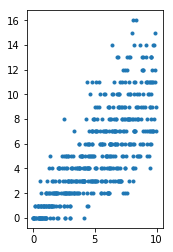

In [31]:
nbData=500
X0=np.random.uniform(low=0,high=10,size=nbData)
X1=np.random.poisson(lam=X0,size=nbData)
""" on crée la dataFrame"""
X=np.zeros([nbData,2])
X[:,0]=X0
X[:,1]=X1
# on aurait aussi pu faire directement: 
#      X = np.stack([X0,X1],axis=1) 

plt.plot(X[:,0],X[:,1],'.')
plt.gca().set_aspect("equal")

***Exo:*** Les deux composantes `X0` et `X1` construites dans le code sont-elle indépendantes?  Justifiez votre réponse en observant la fonction `x -> Loi(X1/X0=x)`

***Exo:*** `X0` admet-t-il une densité par rapport à la mesure de Lebesgue? Par rapport à la mesure de comptage? Même quesion pour `X1`, même question pour le couple `X= (X0,X1)`. 


## Espérance, Covariance, Corrélation


### Définissions

* L'espérance de $X$ c'est le vecteur $\mu = \mathbf E[X]$ défini par $\mu_i = \mathbf E[X_i]$. 

*  la matrice de covariance de $X$ c'est la matrice $\Sigma^2=\mathbf V[X]$ définie par $\Sigma^2_{ij}= \mathrm{cov}(X_i,X_j)$. On peut l'écrire avec une multiplication matricielle:
$$
\Sigma^2 = \mathbf E[ (X-\mu)  (X-\mu)^T ] 
$$ 
 (où nous supposons, comme pour les vecteurs, que l'espérance d'une matrice aléatoire, c'est la matrice des espérances).  
 
* Les coefficients de corrélation sont définis par  
$$
c_{ij} = \frac{\mathrm{cov}(X_i,X_j)  }{ \sqrt{\mathbf V(X_i)}  \sqrt{\mathbf V(X_j)}  }
$$
Quelle fameuse inégalité permet d'affirmer que ces coefficients sont compris entre $-1$ et $+1$?
 
 
***Exo:*** Soit $a$ une matrice et $b$ un vecteur. On a:

* $\mathbf E[aX+b] =a \mathbf E[X]+b$.
* $\mathbf V[aX+b] = a\mathbf V[X]a^T$. 
 

A partir d'une dataFrame, on peut estimer l'espérance et la matrice de covariance du vecteur aléatoire sous-jacent:

In [32]:
mean=np.mean(X,axis=0)
print("mean:",mean)
X_cen = X - mean
cov =  X_cen.T @ X_cen  /  nbData
print("covariance à la main:\n",cov)

cov=np.cov(X.T)
print("covariance toute faite:\n",cov)

mean: [5.13 5.21]
covariance à la main:
 [[ 7.67  7.66]
 [ 7.66 13.12]]
covariance toute faite:
 [[ 7.69  7.68]
 [ 7.68 13.15]]


Insistons sur le fait que nous n'avons fait  qu'estimer l'espérance et la matrice de covariance. D'ailleurs l'estimateur de la covariance serait un peu meilleur si... (Aide: en numpy, l'amélioration se fait avec `np.cov(X.T,ddof=1)`)

***Exo:*** Sauriez-vous écrire une formule explicite qui donne les vraies espérances des v.a `X0` et `X1`? Et les variances/covariance? Attention, ce n'est pas facile. Certaines formules comporteront des symboles $\int$ et $\sum$ mélangés. 

### Interprétation géométrique de la covariance


La matrice $\Sigma^2$ est symétrique et ses valeurs propres sont positives.   Donc on peut l'écrire 
$$
\Sigma^2=U  S^2  U^T
$$
 avec $S^2$ la matrice diagonale formée des valeurs singulières (=valeurs propres) que l'on classe dans l'ordre décroissant $s_{0}^2>s_{1}^2 >... $,   et $U$  une matrice orthogonale.


Considérons un vecteur aléatoire $X$ de matrice de covariance $\Sigma^2= U S^2 U^T$. Notons $U_{i}$ les colonnes de $U$.   On note naturellement $s_i$ les racines carrées des $s^2_i=S^2_{i,i}$.   Elles sont ordonnées  $s_0\leq s_1 \leq ...$.   On note $\mu$ le vecteur espérance de $X$.    Si maintenant nous simulons des copies indépendantes de $X$, elles formeront un nuage de point autour de $\mu$, dont la dispersion sera décrite par  les $U_i$  et $s_i$ :  


***Exo:*** 
* Soit $X$ un vecteur aléatoire de matrice de covariance  $\Sigma^2=U S^2 U^T$ et d'espérance $\mu$.  Notons $\Sigma = U S U^T.$  Quelles est la matrice de covariance de $\Sigma^{-1} (X-\mu)$ ?  Faites le lien avec le fait de centrer-réduire les va. 
* $\Sigma^2$ est symétrique et ses valeurs propres sont positives. La symétrie est évidente. Pour les valeurs propres, il suffit de montrer qu'elle est semi-définie positive. Vérifions-le : $\forall v :  v^T \Sigma^2 v = ... \geq 0$.

[[1. 0.]
 [0. 1.]]


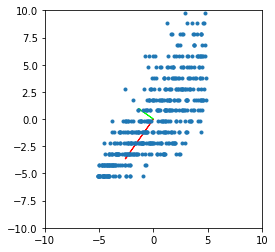

In [33]:
U,S2,_=np.linalg.svd(cov)
print(U@U.T)
S=np.sqrt(S2)
plt.plot(X_cen[:,0],X_cen[:,1],'.');
showBasis(U@np.diag(S),lim=(-10,10))

***Attention 1:*** même en classant les valeurs propres par ordre décroissant, il n'y a pas unicité de la base $U$ (il y a des choix d'orientation et il faut aussi faire des choix de base on a des valeurs propres multiples). 
 
***Attention 2 :***   tous les vecteurs aléatoires ne se répartissent pas en patate. Voici des simulations de vecteurs aléatoires de $\mathbb R^2$ qui admettent tous la matrice identité pour matrice de covariance (merci wikipedia).

![nuages de point avec covariance identité](img/identite.png)


## Vecteurs aléatoires gaussiens


Un vecteur aléatoire est gaussien, si toutes les combinaisons linéaires qu'on peut en faire sont des v.a gaussiennes.
Je trouve cette définition classique très peu constructive. En voici une plus explicite, en deux étapes. 


### gaussien standart $\to$  gaussien général

* Soit $Y\in \mathbb R^p$.
On dit que $Y$ est un vecteur gaussien standart, et on note $Y\sim \mathcal N_p(0,I)$  lorsque les composantes $Y_i$  sont des $\mathcal N(0,1)$ indépendantes.  Son espérance est $0=(0,...,0)$ et sa matrice de covariance c'est $I$. 

* Les vecteurs gaussiens sont tous les vecteurs de la forme $a Y+b$ avec $a$ matrice, $b$ vecteur et $Y\sim\mathcal  N_p(0,I)$. 

 Ainsi par construction, la famille des vecteurs gaussiens est stable par combinaison affine. 


### gaussien général $\to$ gaussien standart


Ainsi, par définition, un vecteur gaussien général c'est $X= aY + b$ avec $Y \sim \mathcal  N_p(0,I)$.  L'espérance de $X$ est alors $\mu = b$ et  sa matrice de covariance est alors $\Sigma^2 = a a^T$ (cf. ancien exo).  

Définissons alors $Y' := \Sigma^{-1} (X-\mu)$ (attention, on ne retombe pas forcément sur $Y$).  On a que 
$$
X = \Sigma Y' + \mu   \qquad \mathrm{ et } \qquad Y' \sim N_p(0,I)
$$ 
Ci-dessus, on a une écriture "canonique" d'un vecteur Gaussien général (une écriture pas tout à fait unique à cause des choix arbitraires dans la SVD).  On voit bien avec cette écriture que la loi de $X$ ne dépend que de sa matrice de covariance $\Sigma^2$ et de son espérance $\mu$. On notera d'ailleurs:
$$
X \sim \mathcal  N_p(\mu, \Sigma^2)
$$ 
Voyons comment on simule un tel vecteur avec `numpy`

Sigma2
 [[ 2 -1]
 [-1  1]]


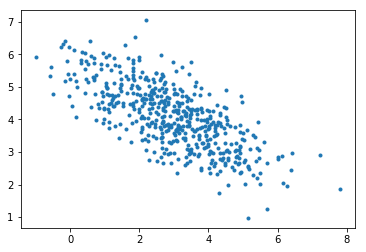

In [34]:
""" choisissons une matrice de covariance """
Sigma2=np.array([[2,-1],[-1,1]])
print("Sigma2\n",Sigma2)
""" un vecteur espérance"""
mu=np.array([3,4])
""" simulons"""
X= np.random.multivariate_normal(mean=mu,cov=Sigma2,size=500)
plt.plot(X[:,0],X[:,1],'.');


***A vous:*** 

* Pourquoi le nuage de points est-il penché dans ce sens? (et pas selon la première bisectrice par exemple)
* Que se passe-t-il si l'on prend `cov` une matrice dégénérée? (faites le!)
* en utilisant la théorie, simulez vous-même ce nuage de point sans utiliser `np.random.multivariate_normal` mais en partant simplement de v.a gaussiennes via `np.random.normal`. Aide: il vous faut aussi utiliser la SVD (et relire le paragraphe précédent). 

## Densité de vecteur aléatoire

Notre tout premier exemple de vecteur aléatoire n'admettait pas de densité par rapport à la mesure de Lebesgue, ni par rapport à la mesure de comptage. Mais dans ce nombreux cas pratiques, une telle densité existe. Nous traitons ici de la densité par rapport à la mesure de Lebesgue. 


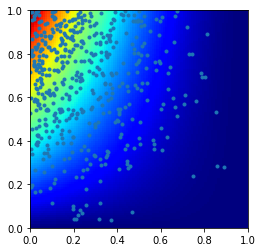

In [35]:
""" une dataFrame à deux colonnes """
def betaBeta(nbData):
    X0=np.random.beta(a=1,b=3,size=nbData)
    X1=np.random.beta(a=2,b=1,size=nbData)
    return np.stack([X0,X1],axis=1)

""" la densité correspondante """
def densityX(x,y):
    return stats.beta.pdf(x,a=1,b=3)*stats.beta.pdf(y,a=2,b=1)


lim=1
xx=np.linspace(0, lim, 100)
yy=np.linspace(0, lim, 100)
XX,YY=np.meshgrid(xx,yy)
den_square=densityX(XX,YY)
plt.imshow(den_square,extent=[0,lim,0,lim],origin="lower",cmap="jet")

X=betaBeta(500)
plt.plot(X[:,0],X[:,1],'.')
plt.gca().set_aspect('equal')


***Exo théorique:*** Les deux composantes `X0` et `X1` sont indépendantes (car on appelle deux fois le générateur aléatoire). Comment est-ce que cela se lit sur la densité? 

***Exo informatique:*** Refaites un programme similaire choisissant certains paramètres de la loi beta <1.  La difficulté c'est qu'on obtient des densités non bornées. Pour effectuer la multiplicaition `f0* f1` il faut alors supprimer les valeurs infinies. Pour cela vous pouvez

* soit restreindre le domaine en excluant les bords du carré $[0,1]^2$
* soit limiter les densités, ex: `f0=np.minimum(f0,1000)`

Mais même en prenant ces précautions, les densités seront moches car les couleurs seront saturées. Astuce: tracez le log de la densité (ce qui revient à changer l'échelle de couleur)

### Cas Gaussien

La densité des vecteurs gaussiens est fournie dans `scipy.stats`

cov
 [[ 2 -1]
 [-1  1]]
X.shape: (500, 2)


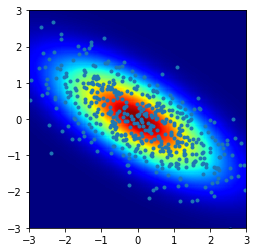

In [36]:

cov=np.array([[2,-1],[-1,1]])
print("cov\n",cov)
X= np.random.multivariate_normal(mean=[0,0],cov=cov,size=500)
print("X.shape:",X.shape)

plt.plot(X[:,0],X[:,1],'.')
plt.gca().set_aspect("equal")

lim=3
resolution=200
xx=np.linspace(-lim,lim,resolution)
XX,YY=np.meshgrid(xx,xx)
XY=np.stack([XX,YY],axis=2)
den=stats.multivariate_normal.pdf(XY,mean=[0,0],cov=cov)

plt.imshow(den,cmap="jet",extent=[-lim,lim,-lim,lim],origin="lower");



### Déformation par multiplication matricielle

Soit $X\in \mathbb R^p$ un vecteur aléatoire de densité $f$. Soit $a$ une matrice inversible $p\times p$. Soit $b\in \mathtt R^p$. La densité de $aX+b$ est:
$$
x\to   \frac 1 {|  \mathrm{det} \,a  |} f \Big(  a^{-1} (x-b)  \Big ) 
$$ 

***Exo:***  Vérifiez cette formule en utilisant la technique de la fonction test. 
$$
\mathbf E[\phi(aX+b)] = \int_{\mathbb R^p} \phi(aX+b) \ f(x) \ dx = ...
$$
***Exo:*** Retrouvez la densité de $\mathcal N_p(0,\Sigma^2)$ à partir de la densité de $\mathcal N_p(0,I)$. Aide: Avec la svd on sait qu'on peut écrire $\Sigma^2=\Sigma^T \Sigma$. Mais cette racine carrée $\Sigma$(quelque peu arbitraire) ne doit pas apparaître dans l'expression finale.

Déformons les réalisations des vecteurs aléatoires `betaBeta`. 

X.shape: (500, 2)


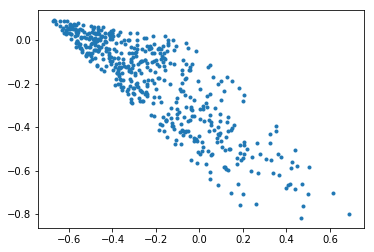

In [45]:
X= betaBeta(500)
a=np.array([[1,-1],[-0.7,0.1]])
print("X.shape:",X.shape)
""" attention: informatiquement les vecteurs aléatoires sont en ligne 
et non en colonne comme dans la théorie. 
Du coup, la multiplication par la matrice se fait à droite:"""
aX=X@a
plt.plot(aX[:,0],aX[:,1],'.')
plt.gca().set_aspect('equal')


Pour tracer informatiquement la densité déformée il faut bien réfléchir. 

Observons ce que renvoie `meshgrid` sur un petit exemple. Voyons comment nous devons le transformer.  

In [38]:
xx=[1,2,3]
yy=[0,1,2,3]
""" meshgrid répète les abscisses et les ordonnées """
XX,YY=np.meshgrid(xx,yy)
print("XX\n",XX)
print("YY\n",YY)

""" on colle le tout"""
XY=np.stack([XX,YY])
print("XY.shape:",XY.shape)

""" on transforme les deux matrices en une liste de couple (abscisse,ordonnée)"""
XY_flat=np.reshape(XY,newshape=[2,4*3])
print("XY_flat.shape:",XY_flat.shape)
print("XY_flat\n",XY_flat)

"""sur chacun de ces couples, on effectue la multipliation matricielle"""
print("a@XY_flat\n",a@XY_flat)




XX
 [[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
YY
 [[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]]
XY.shape: (2, 4, 3)
XY_flat.shape: (2, 12)
XY_flat
 [[1 2 3 1 2 3 1 2 3 1 2 3]
 [0 0 0 1 1 1 2 2 2 3 3 3]]
a@XY_flat
 [[ 1.   2.   3.   0.   1.   2.  -1.   0.   1.  -2.  -1.   0. ]
 [-0.7 -1.4 -2.1 -0.6 -1.3 -2.  -0.5 -1.2 -1.9 -0.4 -1.1 -1.8]]


XY.shape: (2, 200, 200)
XY_flat.shape: (2, 40000)
den_flat.shape: (40000,)
den_square.shape: (200, 200)


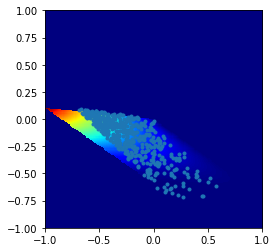

In [39]:
def deform_density(density, x, y,a):
    a_inv=np.linalg.inv(a)    
    xy=np.stack([x,y])
    axy=a_inv@xy
    ax=axy[0]
    ay=axy[1]
    return density(ax,ay)
    
lim=1
resolution=200
xx=np.linspace(-lim,lim,resolution)
XX,YY=np.meshgrid(xx,xx)
XY=np.stack([XX,YY])
print("XY.shape:",XY.shape)
XY_flat=np.reshape(XY,newshape=[2,resolution*resolution])
print("XY_flat.shape:",XY_flat.shape)
den_flat=deform_density(densityX, XY_flat[0], XY_flat[1],a)
print("den_flat.shape:",den_flat.shape)

den_square=np.reshape(den_flat,newshape=[resolution,resolution])
print("den_square.shape:",den_square.shape)

plt.imshow(den_square,cmap="jet",origin="lower",extent=[-lim,lim,-lim,lim])
      
plt.plot(aX[:,0],aX[:,1],'.')
plt.gca().set_aspect('equal');

***A vous:*** Mince, cela ne colle pas tout à fait. Il y a un bug dans le programme précédent. Aide: la densité est la bonne (à une constante près), ce sont les simulations qui buguent. 

***Exo:*** Ajouter les deux directions principales de ce nuage de point, en utilisant `showBasis`. Il y a plusieurs techniques pour les calculer:
* estimer la matrice de covariance avec `np.cov`
* calculer exactement cette matrice (ici c'est très facile, il suffit de regarder la formule pour la variance d'une loi beta, que l'on peut aussi avoir avec `stats.beta.std`)
* ou partir directement de la svd ou de la diagonalisation de matrice `a`. 